6920.376000000015
6480.8640029440085


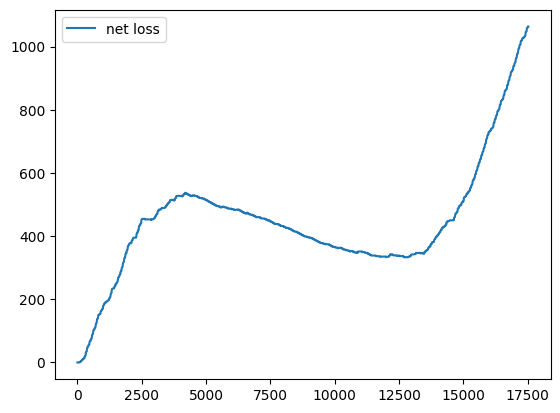

In [8]:
import json
from matplotlib import pyplot as plt
import numpy as np

# Path to the log.json file
file_path = '/Users/antonlenander/git/CommunityFlex/logs/log1/log.json'

new_metrics = {}
messages = []


# Open and read the log.json file
with open(file_path, 'r') as file:
    log_data = json.load(file)
    # Iterate through the list in the "steps" key
    for step in log_data.get('steps', []):
        #print(step)
        metrics = step.get('metrics', {})
        messages.append(step.get('messages'))
        if isinstance(metrics, dict):
            for key, value in metrics.items():
                if key not in new_metrics:
                    new_metrics[key] = []
                new_metrics[key].append(value)
                
agent = 'H3'

#start = 336*4*6
#end = 336*4*7 - (336*3)
start = 0
end = 48*365

current_load = new_metrics[f'{agent}/current_load']
current_prod = new_metrics[f'{agent}/current_prod']
current_charge = new_metrics[f'{agent}/current_charge']
current_supply = new_metrics[f'{agent}/current_supply']
net_loss = new_metrics[f'{agent}/net_loss']

total_load = new_metrics['env/total_load']
total_prod = new_metrics['env/total_prod']
total_charge = new_metrics['env/total_charge']
total_supply = new_metrics['env/total_supply']


total_self_consumption = new_metrics['env/self_consumption']
total_local_bought = new_metrics['env/current_local_bought'][1:]

total_avail_energy = new_metrics['env/total_avail_energy']
total_surplus_energy = new_metrics['env/total_surplus_energy']
total_net_loss = new_metrics['env/total_loss']


current_load = current_load[start:end]
current_prod = current_prod[start:end]
current_charge = current_charge[start:end]
current_supply = current_supply[start:end]
net_loss = net_loss[start:end]

total_load = total_load[start:end]
total_prod = total_prod[start:end]
total_charge = total_charge[start:end]
total_supply = total_supply[start:end]
total_self_consumption = total_self_consumption[start:end]
total_local_bought = total_local_bought[start:end]
total_avail_energy = total_avail_energy[start:end]
total_surplus_energy = total_surplus_energy[start:end]
messages = messages[start:end]

print(sum(current_prod))
print(sum(current_load))

#plt.plot(current_load, label='load')
#plt.plot(current_prod, label='production')
#plt.plot(current_supply, label='supply balance')
#plt.plot(current_charge, label='battery charge')
plt.plot(net_loss, label='net loss')

plt.legend()
plt.show()

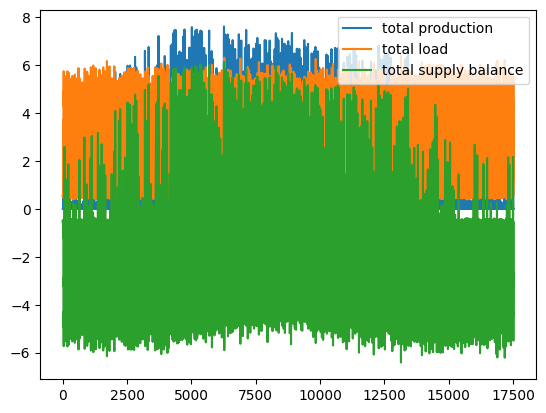

In [9]:
plt.plot(total_prod, label='total production')
plt.plot(total_load, label='total load')
plt.plot(total_supply, label='total supply balance')
plt.legend()
plt.show()

In [10]:
total_E_local = np.add(total_local_bought, total_self_consumption)

plt.plot(total_self_consumption, label='self consumption')
plt.plot(total_E_local, label='total local energy')
plt.plot(total_load, label='total load')
plt.plot(total_local_bought, label='local bought')
plt.plot(total_prod, label='total production')
# plt.plot(np.divide(net_loss, 150))
plt.legend()
plt.show()



ValueError: operands could not be broadcast together with shapes (17519,) (17520,) 

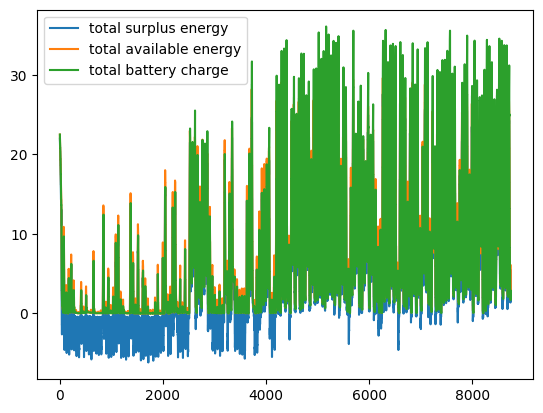

In [ ]:
plt.plot(total_surplus_energy, label='total surplus energy')
plt.plot(total_avail_energy, label='total available energy')
plt.plot(total_charge, label='total battery charge')
plt.plot()
plt.legend()
plt.show()

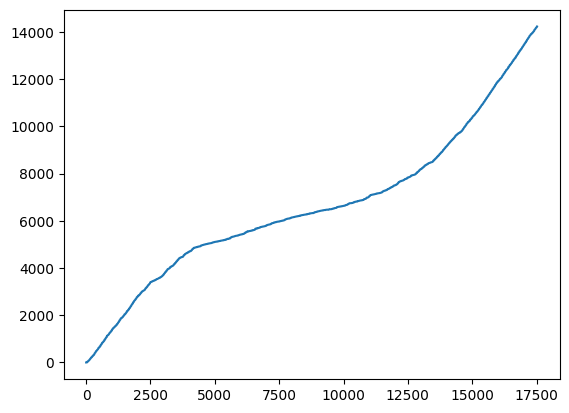

In [ ]:
plt.plot(total_net_loss, label='total net loss')

(array([ 846.,  562.,  388.,  432.,  380.,  370.,  324.,  432.,  420.,
         328.,  244.,  232.,  234.,  192.,  152.,  176.,  168.,  150.,
         238., 2482.]),
 array([0.        , 0.05002518, 0.10005037, 0.15007555, 0.20010073,
        0.25012591, 0.3001511 , 0.35017628, 0.40020146, 0.45022664,
        0.50025183, 0.55027701, 0.60030219, 0.65032738, 0.70035256,
        0.75037774, 0.80040292, 0.85042811, 0.90045329, 0.95047847,
        1.00050366]),
 <BarContainer object of 20 artists>)

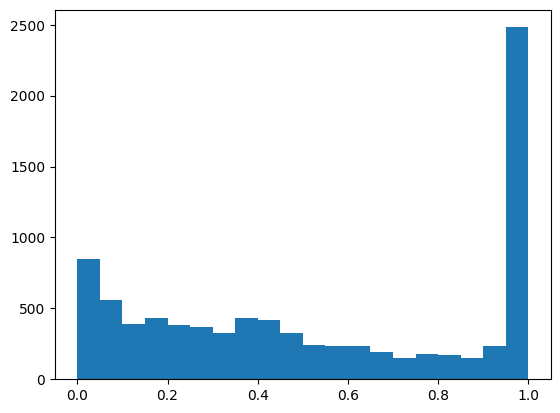

In [ ]:
ss = np.divide(total_E_local, total_load)
plt.hist(ss, bins=20)

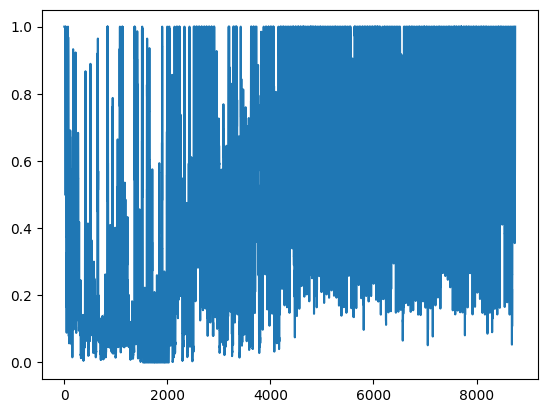

In [ ]:
plt.plot(ss, label='self sufficiency')